# Module 7 Assignment

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer anywhere else other than where it says `YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_).


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
import numpy as np

from numpy.testing import assert_almost_equal, assert_array_equal

from nose.tools import assert_equal, assert_true

import warnings
warnings.filterwarnings('ignore')

# Problem 1: Read in a dataset

For this problem you will read in a dataset from iris_data.csv which is in data folder

- Read dataset to a dataframe from data/iris_data.csv
- Store the dataframe to variable **df**

In [2]:
### BEGIN SOLUTION
df = pd.read_csv('data/iris_data.csv')
### END SOLUTION

In [3]:
assert_equal(len(df), 110, msg="The dataset should have 110 rows. Your solution only has %s"%len(df))
assert_equal(set(df.columns.tolist()), set(['sepal length', 'sepal width', 'petal length',
       'petal width', 'iris type']), 
             msg="Your column names do not match the solutions")
df.head()

,sepal length,sepal width,petal length,petal width,iris type
0,NaN,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Problem 2: Fix column names and fill missing values

In this problem you will fix the column names of the dataframe loaded from problem 1 and fill missing values with mean value of same iris type.

- Directly work on **df** created from problem 1
- Fix all column names so that whitespaces are replaced by '_'
- Convert values in iris type column to all **upper** case
- Fill all missing values with mean value of specific iris type. For example, fill missing sepal length of Iris-setosa with average setosa sepal length.

In [4]:
### BEGIN SOLUTION
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_type']
df.iris_type = df.iris_type.str.upper()
df.fillna(df.groupby('iris_type').transform('mean'), inplace=True)
### END SOLUTION

In [5]:
assert_true('sepal_length' in df.columns, "Column name is fixed as directed")
assert_true('sepal_width' in df.columns, "Column name is fixed as directed")
assert_true('petal_length' in df.columns, "Column name is fixed as directed")
assert_true('petal_width' in df.columns, "Column name is fixed as directed")
assert_true('iris_type' in df.columns, "Column name is fixed as directed")
assert_equal(set(df.iris_type.unique()), {'IRIS-SETOSA', 'IRIS-VERSICOLOR', 'IRIS-VIRGINICA'}, "iris_type values should be all upper case.")
assert_equal(df.shape[0], 110, "df doesn't have correct values")
assert_equal(df.sepal_length.isnull().sum(), 0, "sepal_length column has missing values")
assert_equal(df.sepal_width.isnull().sum(), 0, "sepal_width column has missing values")
assert_equal(df.petal_length.isnull().sum(), 0, "petal_length column has missing values")
assert_almost_equal(df.iloc[0,0], 5.004, 3, "Missing value is not filled with correct value")
assert_almost_equal(df.iloc[50,1], 2.776, 3, "Missing value is not filled with correct value")
assert_almost_equal(df.iloc[80,2], 5.590, 3, "Missing value is not filled with correct value")
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,5.004082,3.5,1.4,0.2,IRIS-SETOSA
1,4.900000,3.0,1.4,0.2,IRIS-SETOSA
2,4.700000,3.2,1.3,0.2,IRIS-SETOSA


# Problem 3: EDA: Plot average petal width for different iris typs

In this problem you will plot a bar plot on average petal width for different iris types.

- Work on **df** created from problem 1 and fixed in problem 2
- Use seaborn barplot to plot a vertical bar plot
- The height of bars are average petal width
- The plot should have 3 bars, one for each iris type.
- The plot should have a descriptive title
- Assign returned axes by barplot() to variable **ax1**

Text(0.5, 1.0, 'Average Petal Width')

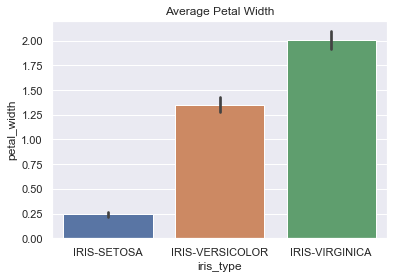

In [6]:
### BEGIN SOLUTION
ax1 = sns.barplot(x='iris_type', y='petal_width', data=df)
ax1.set_title("Average Petal Width")
### END SOLUTION

In [7]:
assert_true(len(ax1.title.get_text()) > 0, msg="Your plot doesn't have a title.")
assert_equal(ax1.get_xlabel(), 'iris_type', msg="Bar plot not for different iris types")
assert_equal(ax1.get_ylabel(), 'petal_width', msg="Bar plot is not plot on average petal width")

# Problem 4: EDA: Plot multiple box plots

In this problem you will plot a multiple box plot to display sepal length feature of different iris types.

- Work on **df** created from problem 1 and fixed in problem 2
- Use seaborn boxplot to plot a vertical box plot
- The plot should have 3 boxs, one for each iris type.
- The plot should have a descriptive title
- Assign returned axes by boxplot() to variable **ax2**

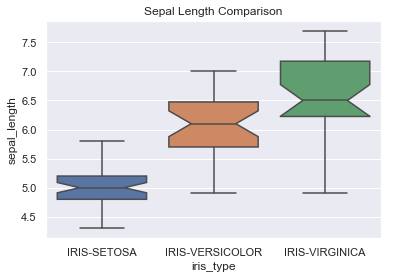

In [8]:
### BEGIN SOLUTION
# Boxplot
ax2 = sns.boxplot(x='iris_type', y='sepal_length', data=df, notch=True)

# Title plot
ax2.set_title('Sepal Length Comparison')
plt.show()
### END SOLUTION

In [9]:
assert_true(len(ax2.title.get_text()) > 0, msg="Your plot doesn't have a title.")
assert_equal(ax2.get_xlabel(), 'iris_type', msg="Bar plot not for different iris types.")
assert_equal(ax2.get_ylabel(), 'sepal_length', msg="Bar plot is not plot on sepal length.")

# Problem 5: Construct a linear regression model

In this problem you will construct a linear regression model using statsmodels.

- Work with **df** created from problem 1 and fixed in problem 2
- **petal_width** will be the dependent variable
- All other columns are independent variable
- Enclose categorical feature with "C()" in the regression formula
- Create linear regression model with ols function in statsmodels.formula.api
- Fix the model and assign fitted model to variable **result**

In [10]:
import statsmodels.formula.api as smf
### BEGIN SOLUTION
formula = "petal_width ~ sepal_length + sepal_width + petal_length + C(iris_type)"
model = smf.ols(formula, data=df)
result = model.fit()
### END SOLUTION

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     568.1
Date:                Tue, 07 May 2019   Prob (F-statistic):           8.75e-74
Time:                        13:44:34   Log-Likelihood:                 55.559
No. Observations:                 110   AIC:                            -99.12
Df Residuals:                     104   BIC:                            -82.91
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2613      0.180     -1.450      0.150      -0.619       0.096
C(iris_type)[T.IRIS-VERSICOLOR]     0.6064      0.132      4.586      0.000       0.344       0.869
C(iris_type)[T.IRIS-VIRGINICA]      0.9383      0.182      5.167      0.000       0.578       1.298
sepal_length                       -0.1516      0.051     -2.996      0.003      -0.252      -0.051
sepal_width                         0.2469      0.050      4.955      0.000       0.148       0.346
petal_length                        0.2869      0.055      5.188      0.000       0.177       0.397
==============================================================================
Omnibus:                        2.634   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.208
Skew:                           0.173   Prob(JB):                        0.331
Kurtosis:                       3.602   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
assert_almost_equal(result.rsquared, 0.96, 2, "Regression result is not correct")
assert_almost_equal(result.bic, -82.91, 2, "Regression result is not correct")

-----

**&copy; 2019: Gies College of Business at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode